### 1. 개발

In [1]:
%%writefile ../src/math.sol
pragma solidity 0.6.4;

contract Math {
    function powerOf2(uint256 input) public pure returns(uint256) {
        return 2**input;
    }
}

Writing ../src/math.sol


### 2. 컴파일

In [2]:
!solc --abi --bin --gas ../src/math.sol


======= ../src/math.sol:Math =======
Gas estimation:
construction:
   87 + 35000 = 35087
external:
   powerOf2(uint256):	1891
Binary:
6080604052348015600f57600080fd5b5060af8061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063bdacc0cf14602d575b600080fd5b605660048036036020811015604157600080fd5b8101908080359060200190929190505050606c565b6040518082815260200191505060405180910390f35b60008160020a905091905056fea26469706673582212206c7b82296a02fbac41624f04547b167712b71cdda3010f4ac0be9199ff91cb4164736f6c63430006040033
Contract JSON ABI
[{"inputs":[{"internalType":"uint256","name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"pure","type":"function"}]


### 3. 배포

In [3]:
%%writefile ../src/mathDeploy.js
var Web3 = require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));
}

var _abi = [{"inputs":[{"internalType":"uint256","name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"pure","type":"function"}];
var _bin = "6080604052348015600f57600080fd5b5060af8061001e6000396000f3fe6080604052348015600f57600080fd5b506004361060285760003560e01c8063bdacc0cf14602d575b600080fd5b605660048036036020811015604157600080fd5b8101908080359060200190929190505050606c565b6040518082815260200191505060405180910390f35b60008160020a905091905056fea26469706673582212206c7b82296a02fbac41624f04547b167712b71cdda3010f4ac0be9199ff91cb4164736f6c63430006040033";
var _contract = new web3.eth.Contract(_abi);

// unlock the account with a password provided
// web3.personal.unlockAccount(web3.eth.accounts[0], 'password');

_contract
    .deploy({ data: "0x"+_bin })
    .send({
     from: '0x7FBA12d09e75d1888779cA51dc2cF53f818f72DC',
     gas: '1000000'
    })
    .then(function(newContractInstance){
        console.log("contract address: "+newContractInstance.options.address)
    });

Writing ../src/mathDeploy.js


In [4]:
!node ../src/mathDeploy.js

contract address: 0xB80d8AC5Cd3d1d455fa2DAdB05f925281Fa5b128


### 4. 사용

In [17]:
%%writefile ../src/mathUse.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"));

var _abi = [{"inputs":[{"internalType":"uint256","name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"pure","type":"function"}];
var math = new web3.eth.Contract(_abi, "0xB80d8AC5Cd3d1d455fa2DAdB05f925281Fa5b128");
math.methods.powerOf2(8).call().then(function(value) { console.log("2^8: "+value); });
math.methods.powerOf2(32).call().then(function(value) { console.log("2^32: "+value); });

Overwriting ../src/mathUse.js


In [18]:
!node ../src/mathUse.js

2^8: 256
2^32: 4294967296


### dApp

In [19]:
%%writefile ../scripts/math.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.3.5/dist/web3.min.js"></script>
<script type="text/javascript">
    var web3 = new Web3(new Web3.providers.HttpProvider("http://127.0.0.1:8345"));
    
    function displayMath() {
        var math = new web3.eth.Contract([{"inputs":[{"internalType":"uint256","name":"input","type":"uint256"}],"name":"powerOf2","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"pure","type":"function"}],
                                          "0xB80d8AC5Cd3d1d455fa2DAdB05f925281Fa5b128");
        math.methods.powerOf2(32).call().then(function(str) {
            document.getElementById('powerOf2').innerText = "2^32: "+str;
        });
    }
</script>
</head>

<body>
    <h1>MATH</h1>
    <button type="button" onClick="displayMath();">powerOf2</button>
    <div></div>
    <div id="powerOf2"></div>
</body>
</html>

Overwriting ../scripts/math.html


In [22]:
from IPython.display import Image

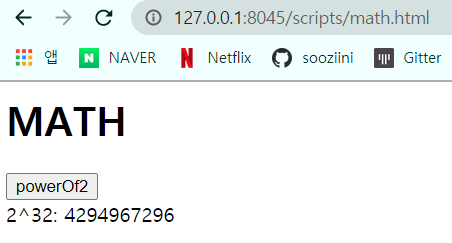

In [23]:
Image("img.PNG")